In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
df = pd.read_csv('data.csv', encoding='latin1')
print(df.columns)
df.dtypes

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [13]:

df['in_deezer_playlists'] = df['in_deezer_playlists'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)
df['in_shazam_charts'] = df['in_shazam_charts'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df['in_shazam_charts'].fillna(0, inplace=True)
df['in_shazam_charts'] = df['in_shazam_charts'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)
data = pd.get_dummies(df, columns=['key', 'mode'])


C:\Users\diabo\AppData\Local\Temp\ipykernel_387220\4014284281.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['in_shazam_charts'].fillna(0, inplace=True)


C:\Users\diabo\AppData\Local\Temp\ipykernel_387220\4012232159.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


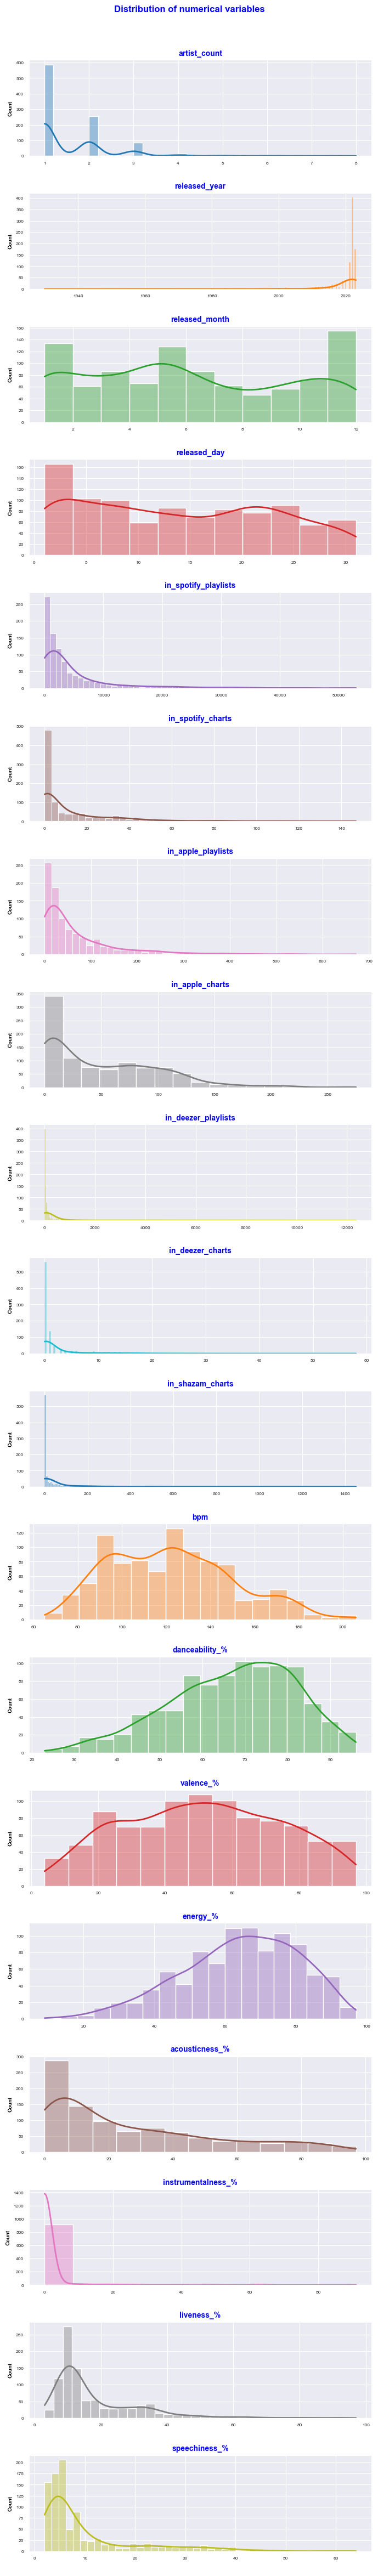

In [14]:

cat_cols = df.select_dtypes(include = ['object', 'category']).columns.to_list()
num_cols = df.select_dtypes(include = ['float', 'int']).columns.to_list()
fig,axes = plt.subplots(20, 1, figsize = (7, 50))
axes = axes.flat

for i, num_col in enumerate(num_cols):
  sns.histplot(df,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 10, fontweight = 'bold', color = 'blue')
  axes[i].tick_params(labelsize = 6)


fig.delaxes(axes[19])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'blue')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()

C:\Users\diabo\AppData\Local\Temp\ipykernel_387220\122071820.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_top["track_name"], x=df_top[col], palette="pastel")
C:\Users\diabo\AppData\Local\Temp\ipykernel_387220\122071820.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_top["track_name"], x=df_top[col], palette="pastel")
C:\Users\diabo\AppData\Local\Temp\ipykernel_387220\122071820.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_top["track_name"], x=df_top[col], palette="pastel")
C:\Users\diabo\AppData\Local\Temp\

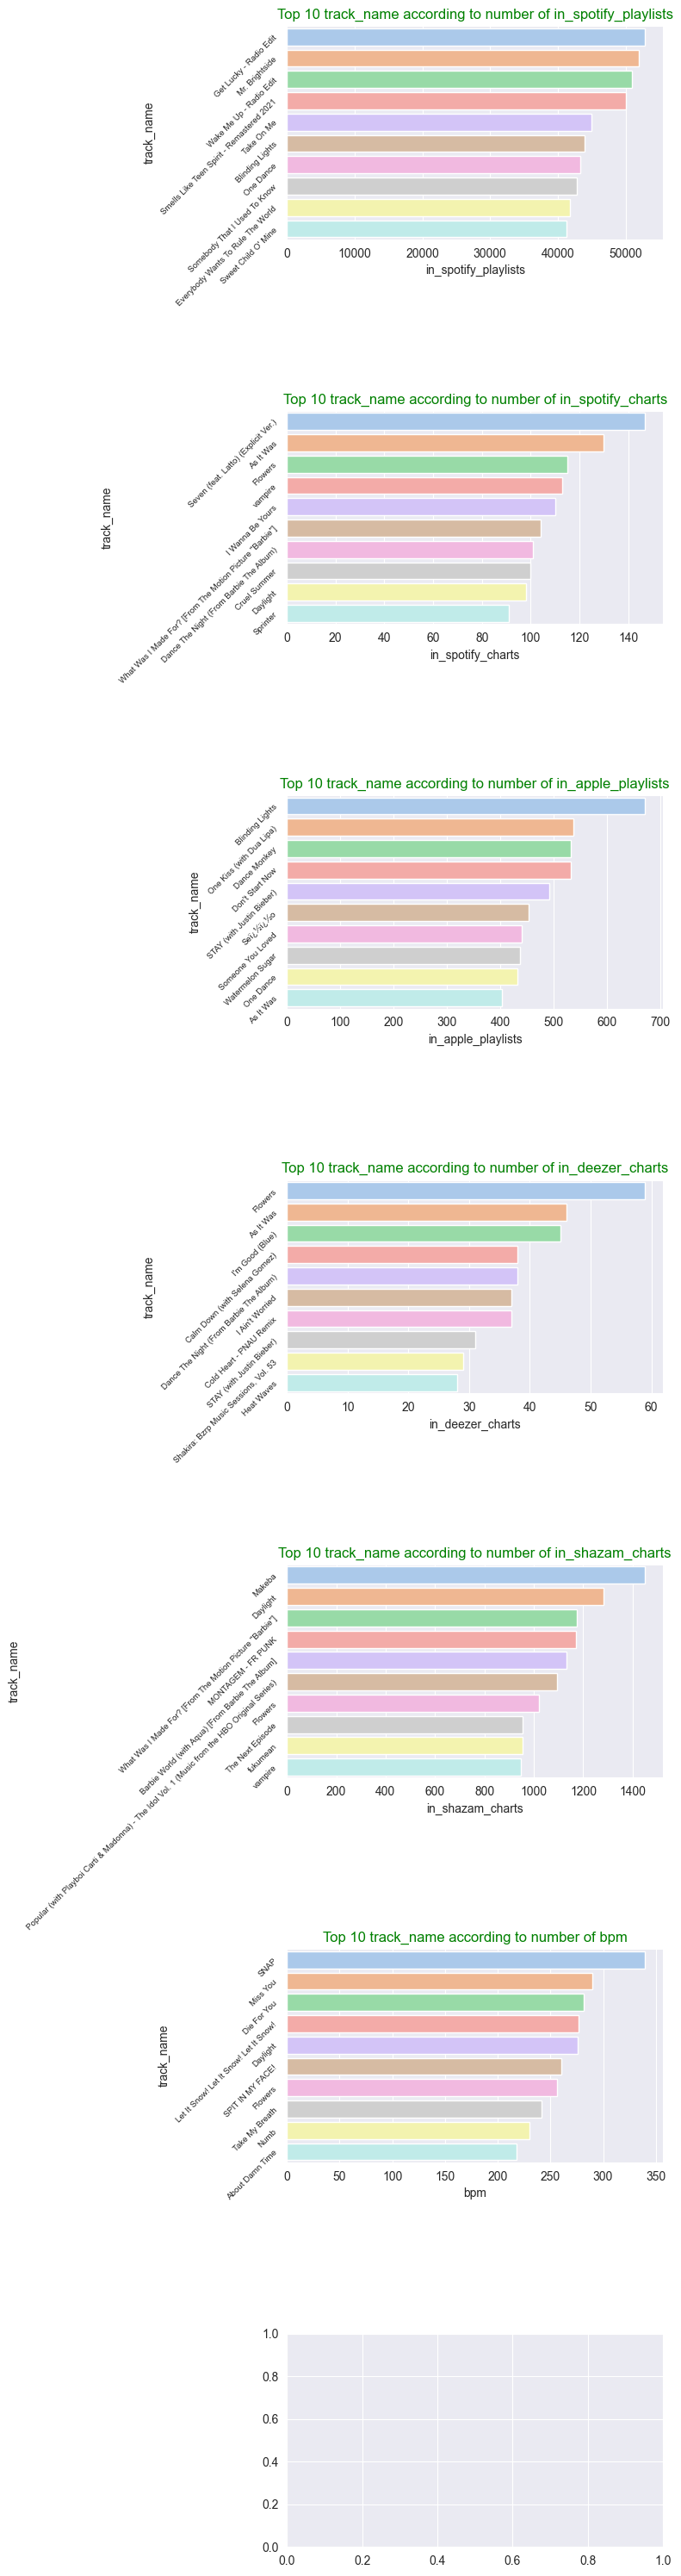

In [15]:
cols = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm']
fig, axes = plt.subplots(7, 1, figsize=(8, 30))

for ind, col in enumerate(cols):
    plt.subplot(7, 1, ind+1)
    df_top = df.groupby(['track_name'])[[col]].sum().reset_index()
    df_top = df_top.sort_values(by=(col), ascending=False).head(10)

    sns.barplot(y=df_top["track_name"], x=df_top[col], palette="pastel")
    plt.yticks(rotation=45, fontsize = 7)
    plt.title(f"Top 10 track_name according to number of {col}", fontsize = 12, color = 'green')

plt.tight_layout()

In [16]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [17]:
print(df['streams'].unique())
df.dtypes
import pandas as pd

# Convertir la colonne 'streams' en numérique
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'] = df['streams'].fillna(0)
df['streams'] = df['streams'].astype(int)
df['streams'].unique()
df.head()


['141381703' '133716286' '140003974' '800840817' '303236322' '183706234'
 '725980112' '58149378' '95217315' '553634067' '505671438' '58255150'
 '1316855716' '387570742' '2513188493' '1163093654' '496795686' '30546883'
 '335222234' '363369738' '86444842' '52135248' '1297026226' '200647221'
 '115364561' '78300654' '899183384' '61245289' '429829812' '127408954'
 '22581161' '52294266' '843957510' '999748277' '618990393' '123122413'
 '188933502' '1355959075' '786181836' '176553476' '354495408' '2808096550'
 '1109433169' '1047101291' '65156199' '570515054' '1085685420'
 '1647990401' '2565529693' '518745108' '107753850' '177740666' '153372011'
 '57876440' '1813673666' '3703895074' '256483385' '1214083358' '16011326'
 '812019557' '111947664' '156338624' '720434240' '357925728' '674072710'
 '1755214421' '404562836' '373199958' '14780425' '39578178' '54266102'
 '2557975762' '751134527' '2282771485' '1356565093' '1592909789'
 '635412045' '1230675890' '585695368' '43857627' '2009094673' '600976848

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [18]:
#Suppression des doublons et des valeurs manquantes
df = df.drop_duplicates()
df = df.dropna()
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [19]:

X = df[['danceability_%', 'valence_%', 'energy_%',
        'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
y = df['streams']  

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz


rf_model = RandomForestRegressor()
rf_model.fit(X, y)
tree = rf_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,
                           filled=True, rounded=True,  
                           special_characters=True)


In [21]:
from sklearn.metrics import r2_score


y_pred = rf_model.predict(X)

r2 = r2_score(y, y_pred)
print("Coefficient de détermination (R²) :", r2)


Coefficient de détermination (R²) : 0.8456358822735985


In [22]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib

adaboost_model = AdaBoostRegressor(DecisionTreeRegressor())
adaboost_model.fit(X, y)

y_pred = adaboost_model.predict(X)
r2 = r2_score(y, y_pred)
print("Coefficient de détermination (R²) :", r2)
joblib.dump(adaboost_model, 'model.pkl')

Coefficient de détermination (R²) : 0.9965655190493468


['model.pkl']

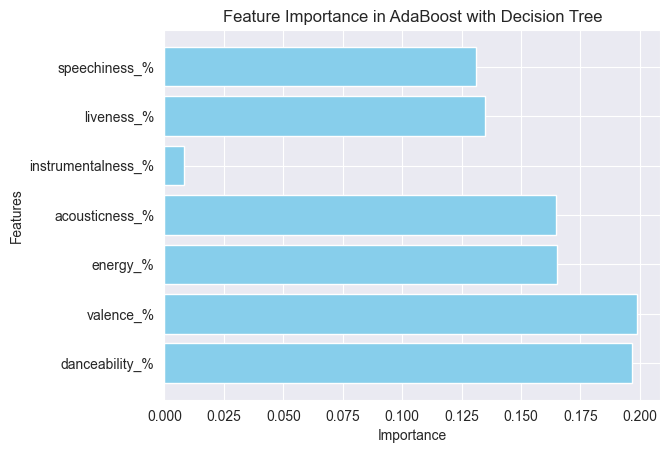

In [23]:
feature_importances = adaboost_model.feature_importances_
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in AdaBoost with Decision Tree')
plt.show()